# Proyecto #1

## Course: Data science in Python
## Name: Otto Chamo
## Carnet: 19001395
## Sección: V


# 1. Importing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 2. Loading dataset

In [34]:
dataset = pd.DataFrame(np.load('./data/proyecto_training_data.npy'))

dataset.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Renaming columns to their descriptive names provided in 'data/Data fields.txt'

In [35]:
SALE_PRICE_COL = "SalePrice"
OVERALL_QUAL_COL = "OverallQual"
FIRST_FLOOR_SF_COL = "1stFlrSF"
TOTAL_ROOMS_ABOVE_GRADE_COL = "TotRmsAbvGrd"
YEAR_BUILT_COL = "YearBuilt"
LOT_FRONTAGE_COL = "LotFrontage"


In [36]:
dataset = dataset.rename(columns={
    0: SALE_PRICE_COL,
    1: OVERALL_QUAL_COL,
    2: FIRST_FLOOR_SF_COL,
    3: TOTAL_ROOMS_ABOVE_GRADE_COL,
    4: YEAR_BUILT_COL,
    5: LOT_FRONTAGE_COL
})

dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Dataset dimension

In [37]:
dataset.shape

(1460, 6)

## Dataset data types

In [38]:
dataset.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

We want to predict the SalePrice so we take that as our dependent variable $(y)$
and we remove it from the dataset

In [39]:
y = dataset.SalePrice

datasetToWork = dataset.copy().drop(SALE_PRICE_COL, axis=1)

datasetToWork

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,7.0,856.0,8.0,2003.0,65.0
1,6.0,1262.0,6.0,1976.0,80.0
2,7.0,920.0,6.0,2001.0,68.0
3,7.0,961.0,7.0,1915.0,60.0
4,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...
1455,6.0,953.0,7.0,1999.0,62.0
1456,6.0,2073.0,7.0,1978.0,85.0
1457,7.0,1188.0,9.0,1941.0,66.0
1458,5.0,1078.0,5.0,1950.0,68.0


## Splitting in 80% and 20% for validation and testing

In [40]:
x_train, x_test, y_traint, y_test = train_test_split(datasetToWork, y, test_size=0.2)

## Exploring some values of the dataset

In [41]:
datasetToWork.describe()

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,1.382997,386.587738,1.625393,30.202904,24.284752
min,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [42]:
# TODO: peak to peak with range
# https://www.w3schools.com/statistics/statistics_range.php


## Ploting an histogram for each variable

In [43]:
def plot_columns(ds: pd.DataFrame):
    columns = ds.columns
    for i, col in enumerate(columns):
        plt.figure(i)
        sns.histplot(ds[col], kde=True,)

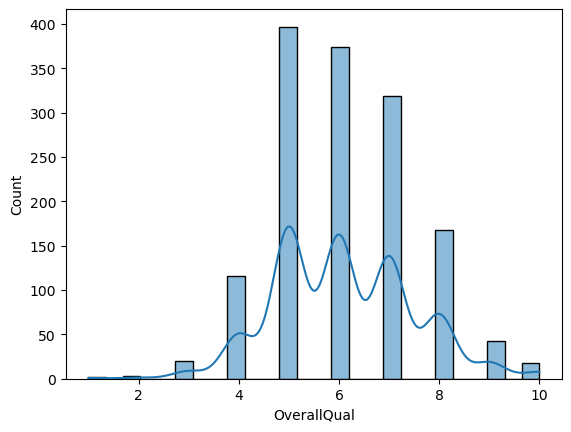

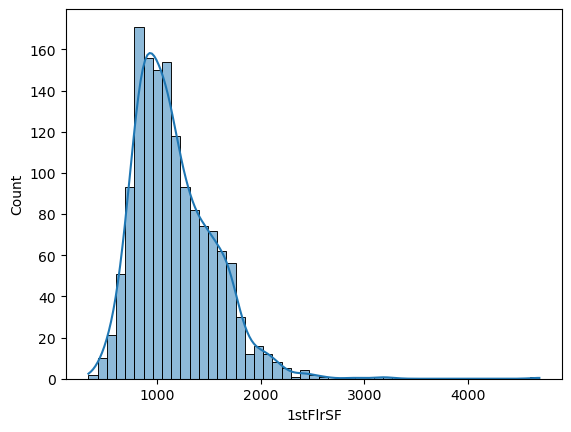

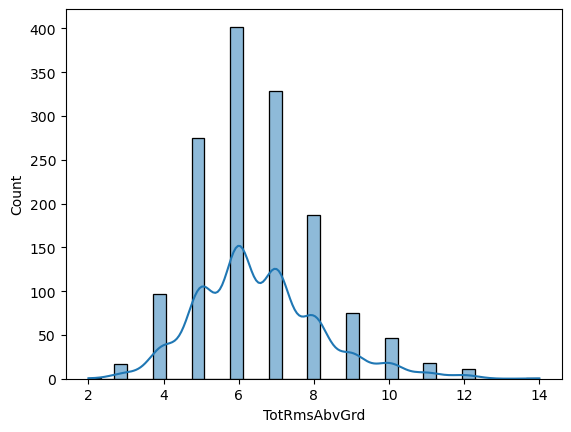

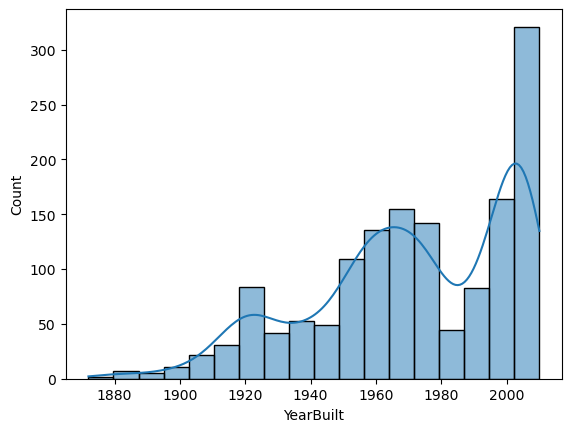

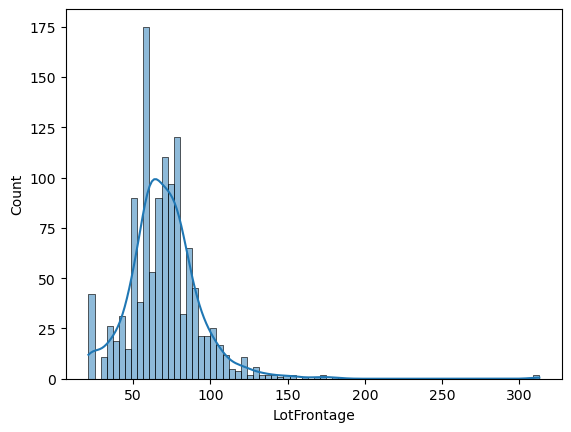

In [44]:
plot_columns(datasetToWork)

## Calculating correlation coefficient of each independent variable.

The Equation for this coefficient is the following

$$
    r = \frac{\sum x_iy_i}{\sqrt{(\sum x_i^2)(\sum y_i^2)}}
$$

Where $x_i = (x_i - \overline{x})$ and $y_i = (y_i - \overline{y})$


## Sources?

https://vitalflux.com/pearson-correlation-coefficient-statistical-significance/